# Calculating insurance premiums

## Introduction

In this exercise we apply a few simple concepts from the textbook to price the insurance premiums for an **expensive urn** based on the failure rate of the pedestal upon which it is placed. 

## Case Study

<img src="https://github.com/TUDelft-MUDE/source-files/raw/main/file/expensive_vase.png" alt="description" style="float:right; width:50%; margin: 0 0 10px 10px;">

The wealthy business magnate Jan van Stroopwafel recently visited Royal Delft. While perusing their gift shop, he came across a beautiful piece of craftsmanship: a [handpainted urn](https://royaldelft.com/en/shop/satyr-vase-landscape/) for the bargain price of only 13,434.00€. To showcase both his wealth and impeccable taste, he decided to give this urn a place of honour in his dining room, so that its ethereal beauty may dazzle his various visitors. (Disclaimer: MUDE is not sponsored by Royal Delft.)

Jan van Stroopwafel is of course aware of the need to protect such a priceless piece of art. Being a man of caution, he has thus decided to insure his beautiful urn against damages. You work as an **insurance clerk** for a local insurance company and are tasked with pricing the policy for Mr. van Stroopwafel. You are now visiting his mansion and are assessing the safety of his art display to assess the risk of the urn suffering any damages over the coming years. Based on this information, you will then provide Mr. van Stroopwafel with a quotation for an insurance premium.

Mr. van Stroopwafel plans to place his urn atop a concrete pedestal. Unfortunately, his interior designer insists that the pedestal be made from Brittle™ concrete. As is well known within the insurance sphere, Brittle™ concrete has a tendency to spontaneously crumble, which may cause the urn to fall off the pedestal and break.

As a first course of action, you decide to look up data on the **stability of Brittle™ concrete**. After a brief search, you have found a dataset of 537 Brittle™ concrete samples:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
import os
import json
from urllib.request import urlretrieve

In [2]:
# This function searches for the data files we require, and downloads them from a server if unsuccessful
def findfile(fname):
    if not os.path.isfile(fname):
        print(f"Downloading {fname}...")
        urlretrieve('https://github.com/TUDelft-MUDE/source-files/raw/main/file/'+fname, fname)

# We download two datasets for concrete and temperature data
findfile('concrete_failure_data.json')

# Load in the concrete failure data
#    - Numbers specify the age (in years) after which this concrete sample broke
#    - "None" means that the sample has not yet broken
#    - The dataset is 37 years old
#    - all samples have the same age
with open("concrete_failure_data.json") as f:
    concrete_failure_data = json.load(f)

# Read out the number of samples
n_samples = len(concrete_failure_data)

<div style="background-color:#AABAB2; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px; width: 95%">
<p>
<b>Task 1:</b>  

Create an empirical failure rate curve based on the data.
</p>
</div>

Text(0, 0.5, 'failure probability')

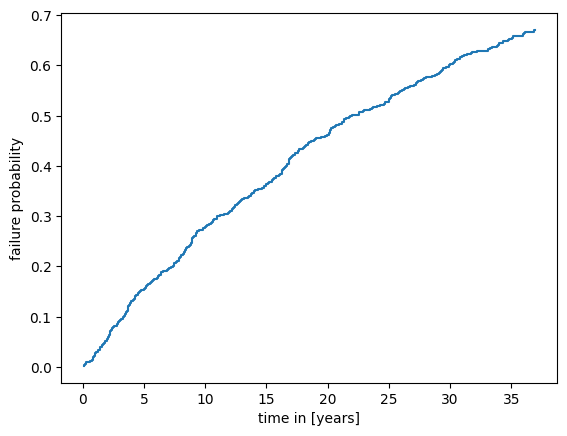

In [3]:
# Remove all the samples that have not failed yet
failed_samples = []
for sample in concrete_failure_data:
    if sample is not None:
        failed_samples.append(sample)

# Sort the failed samples
failed_samples = np.sort(failed_samples)

# Compute the cumulative failure rate
failure_probability = np.arange(1,len(failed_samples)+1,1)/n_samples

# Plot the empirical failure curve
plt.step(
    failed_samples,
    failure_probability)
plt.xlabel("time in [years]")
plt.ylabel("failure probability")

## Computing empirical failure probabilities
Mr. van Stroopwafel would be interested in quotations for insurance policies with a runtime of 10 years and 30 years.

<div style="background-color:#AABAB2; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px; width: 95%">
<p>
<b>Task 2:</b>  

Based on the data, what is the failure risk of the concrete pedestal after 10 years and 30 years?
</p>
</div>

In [4]:
failure_probability_ten_years = np.sum([failure_time <= 10 for failure_time in failed_samples])/n_samples
failure_probability_thirty_years = np.sum([failure_time <= 30 for failure_time in failed_samples])/n_samples

print("The failure probability of the concrete pedestal after 10 years is {}".format(failure_probability_ten_years))
print("The failure probability of the concrete pedestal after 30 years is {}".format(failure_probability_thirty_years))

The failure probability of the concrete pedestal after 10 years is 0.2756052141527002
The failure probability of the concrete pedestal after 30 years is 0.5977653631284916


Your insurance company expects to make at least 20% profit on the insurance policy issued to Mr. van Stroopwafel. Assuming a constant premium, at what **minimum price** should you set Mr. van Stroopwafel's insurance premium for 10 years and for 30 years?

<div style="background-color:#AABAB2; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px; width: 95%">
<p>
<b>Task 3:</b>  

At what yearly premium should you price the policies for a 10 year and 30 year runtime? 

Note: For simplicity, assume that the customer commits to a contract of that duration - if the urn breaks earlier, they must continue to pay.
</p>
</div>

In [5]:
# First, compute the expected insurance claim cost at the end of the insurance premium
cost_vase = 13434 # in Euro
expected_damages_ten_years = cost_vase * failure_probability_ten_years # in Euro
expected_damages_thirty_years = cost_vase * failure_probability_thirty_years # in Euro

# Now add the profit margin
insurance_cost_ten_years = expected_damages_ten_years * 1.2
insurance_cost_thirty_years = expected_damages_thirty_years * 1.2

# Now divide by the runtime
yearly_premium_ten_years = insurance_cost_ten_years / 10
yearly_premium_thirty_years = insurance_cost_thirty_years / 30

print("The minimum yearly insurance premium for the expensive urn is {:.2f}€ for a ten-year contract.".format(yearly_premium_ten_years))
print("The minimum yearly insurance premium for the expensive urn is {:.2f}€ for a thirty-year contract.".format(yearly_premium_thirty_years))

The minimum yearly insurance premium for the expensive urn is 444.30€ for a ten-year contract.
The minimum yearly insurance premium for the expensive urn is 321.22€ for a thirty-year contract.


## Fitting a parametrized distribution

Mr. van Stroopwafel hopes that this urn will become a cherished family heirloom, so he is also interested in exploring an **insurance contract for 100 years**. Unfortunately, your dataset isn't that old. However, you are reasonably sure that the failure curve follows a **gamma distribution**.

<div style="background-color:#AABAB2; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px; width: 95%">
<p>
<b>Task 4:</b>  

Fit a Gamma distribution to the data. Compute the failure probability of the pedestal after 100 years, and compute the yearly insurance premium for a 100-year contract.
</p>
</div>

In [6]:
# Fit a gamma distribution to the data
a, loc, scale = scipy.stats.gamma.fit(failed_samples, floc=0)
print(f"The parameters of the gamma distribution are: a = {a}, floc = {loc}, and scale = {scale}.")

# Evaluate the failure probability after 100 years
failure_probability_hundred_years = scipy.stats.gamma.cdf(100, a = a, loc = loc, scale = scale)
print("The failure probability of the concrete pedestal after 100 years is {}".format(failure_probability_hundred_years))

# Compute the yearly insurance premium over 100 years
expected_damages_hundred_years = cost_vase * failure_probability_hundred_years # in Euro
insurance_cost_hundred_years = expected_damages_hundred_years * 1.2
yearly_premium_hundred_years = insurance_cost_hundred_years / 100
print("The minimum yearly insurance premium for the expensive urn is {:.2f}€ for a hundred-year contract.".format(yearly_premium_hundred_years))

The parameters of the gamma distribution are: a = 1.4643687666094727, floc = 0, and scale = 10.108359153988836.
The failure probability of the concrete pedestal after 100 years is 0.999827192049372
The minimum yearly insurance premium for the expensive urn is 161.18€ for a hundred-year contract.


## Dynamic insurance pricing

Mr. van Stroopwafel is interested in exploring a final option: a dynamically-priced insurance premium whose rate is adjusted every year. He would be interested in knowing the yearly premiums for such a dynamically-priced insurance over the next 100 years.

<div style="background-color:#AABAB2; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px; width: 95%">
<p>
<b>Task 5:</b>  

Compute the yearly insurance premiums based on the fitted Gamma distribution. Do not forget the 20% margin your company expects.
</p>
</div>

Text(0, 0.5, 'Insurance premium in [€]')

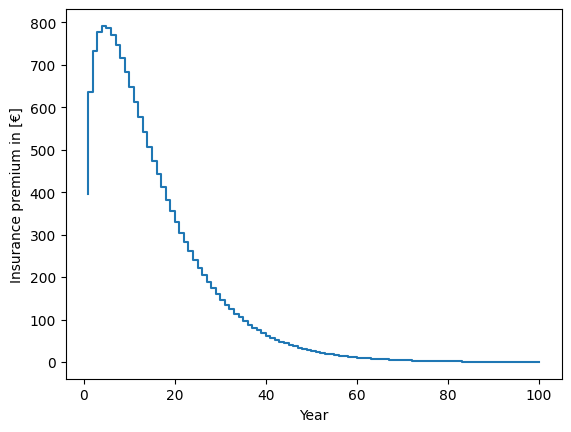

In [7]:
# Define the gamma distribution
gamma_distribution = scipy.stats.gamma(a = a, loc = loc, scale = scale)

# Compute the failure probabilities for every yearly interval
years = np.arange(1,100+1,1)
insurance_costs = []
for year in years:
    failure_probability = gamma_distribution.cdf(year) - gamma_distribution.cdf(year-1)
    expected_damages = cost_vase * failure_probability
    insurance_cost = expected_damages*1.2
    insurance_costs.append(insurance_cost)

# Plot the result
plt.step(
    years,
    insurance_costs
)
plt.xlabel("Year")
plt.ylabel("Insurance premium in [€]")

> By Max Ramgraber, Delft University of Technology. CC BY 4.0, more info on the Credits page of Workbook